In [52]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB
import statsmodels.api as sm

In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv('holdout_test.csv')

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step1: Preprocess the data

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64


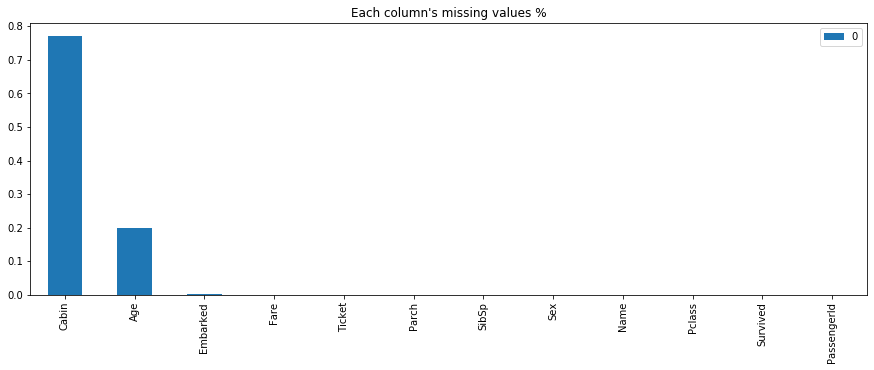

In [56]:
#Check the Missing Values
print((train.isnull().sum()[train.isnull().sum()/len(train)>0]/len(train)).sort_values(ascending =False))
pd.DataFrame((train.isnull().sum()/len(train)).sort_values(ascending =False)).plot(kind='bar',figsize=(15,5),title='Each column\'s missing values %')

Survived    1.000000
Cabin       0.782297
Age         0.205742
Fare        0.002392
dtype: float64


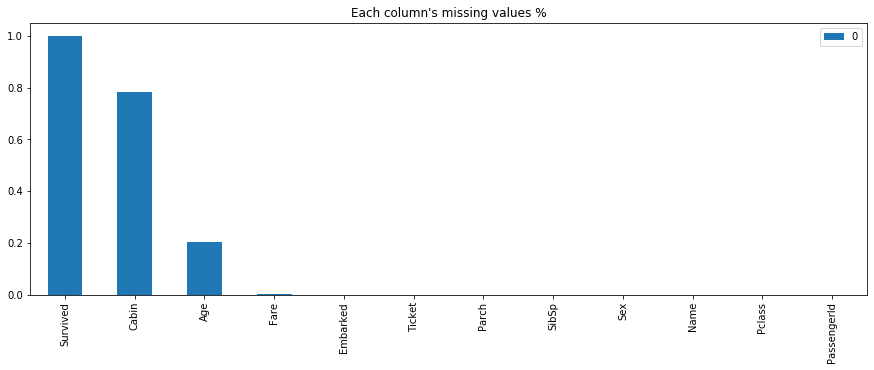

In [57]:
#Check the Missing Values
print((test.isnull().sum()[test.isnull().sum()/len(test)>0]/len(test)).sort_values(ascending =False))
pd.DataFrame((test.isnull().sum()/len(test)).sort_values(ascending =False)).plot(kind='bar',figsize=(15,5),title='Each column\'s missing values %')

In [58]:
#Replace NA
train['Age'].fillna(train['Age'].median() , inplace=True)
train['Embarked'].fillna(train['Embarked'].mode().values[0] , inplace=True)

test['Age'].fillna(train['Age'].median() , inplace=True)
test['Fare'].fillna(train['Fare'].mean(), inplace=True)

In [59]:
#Construct new Predictors
train['FamilySize'] = train['SibSp'] + train['Parch']
train['IsAlone'] = train['FamilySize'].apply(lambda x: 0 if x>0 else 1)
test['FamilySize'] = test['SibSp'] + test['Parch']
test['IsAlone'] = test['FamilySize'].apply(lambda x: 0 if x>0 else 1)

In [60]:
#Drop the Duplicate and insignificant Data
train.drop_duplicates(inplace=True)

col = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Parch' , 'FamilySize' , 'SibSp']
train.drop(col, axis = 1, inplace = True)
test.drop(col, axis = 1, inplace = True)

In [61]:
#Get Dummy
train = pd.get_dummies(train , columns=['Sex' , 'Embarked'])
test = pd.get_dummies(test , columns=['Sex' , 'Embarked'])

In [62]:
X_train = train.drop('Survived' , axis=1)
y_train = train['Survived']

scaler = StandardScaler()
X_train[['Age' , 'Fare']] = scaler.fit_transform(X_train[['Age' , 'Fare']])

### Step 2: Build your models

In [63]:
test['Survived'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

##### As we can see from the above results, there are no response variables in the test dataset.

In [67]:
X_train , X_test , y_train , y_test = train_test_split(X_train , y_train , test_size=0.2 , random_state=19)

#### logistic regression

In [68]:
logistic = LogisticRegression(C=1e9, max_iter=2000)

logistic.fit(X_train, y_train)
# The coefficients
print('Intercept: \n', logistic.intercept_)
print('Coefficients: \n', logistic.coef_)

Intercept: 
 [1.23320055]
Coefficients: 
 [[-1.03098063 -0.46979321  0.06128381  0.12291451  1.86301801 -0.62981745
   0.57947272  0.54516661  0.10856123]]


In [69]:
y_test_predict = logistic.predict(X_test)
print('Accuracy = ' , accuracy_score(y_test, y_test_predict))

Accuracy =  0.8111888111888111


#### SVM

In [70]:
#fit
svc = SVC(kernel='rbf')
svc.fit(X_train , y_train)

SVC()

In [71]:
y_pred = svc.predict(X_test)
score = accuracy_score(y_test , y_pred)
print('Accuracy = ' , score)

Accuracy =  0.8391608391608392


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        95
           1       0.78      0.73      0.75        48

    accuracy                           0.84       143
   macro avg       0.82      0.81      0.82       143
weighted avg       0.84      0.84      0.84       143



#### ROC Curve

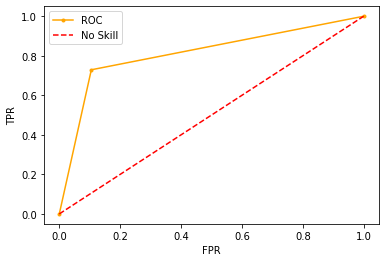

0.8119517543859648

In [73]:
def plot_roc_cur(FPR, TPR):  
    plt.plot(FPR, TPR, color='orange', label='ROC',marker ='.')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label = 'No Skill')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    
FPR, TPR, thresholds = roc_curve(y_test,y_pred,pos_label=1) 
plot_roc_cur(FPR, TPR)
roc_auc_score(y_test, y_pred)

#### KNN methods

In [74]:
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
#Generate Results
print(accuracy_score(y_test,knn_pred))
pd.crosstab(knn_pred, y_test,rownames = ["Predicted"], colnames = ["Actual"])

0.8041958041958042


Actual,0,1
Predicted,,
0,83,16
1,12,32


#### Decision Tree

In [75]:
df = DecisionTreeClassifier(criterion = "entropy", min_impurity_decrease = 0.001,min_samples_split = 100,random_state = 12345)
df = df.fit(X_train, y_train)

In [76]:
y_pred = df.predict(X_test)
score = accuracy_score(y_test , y_pred)
print('Accuracy = ' , score)

Accuracy =  0.8741258741258742


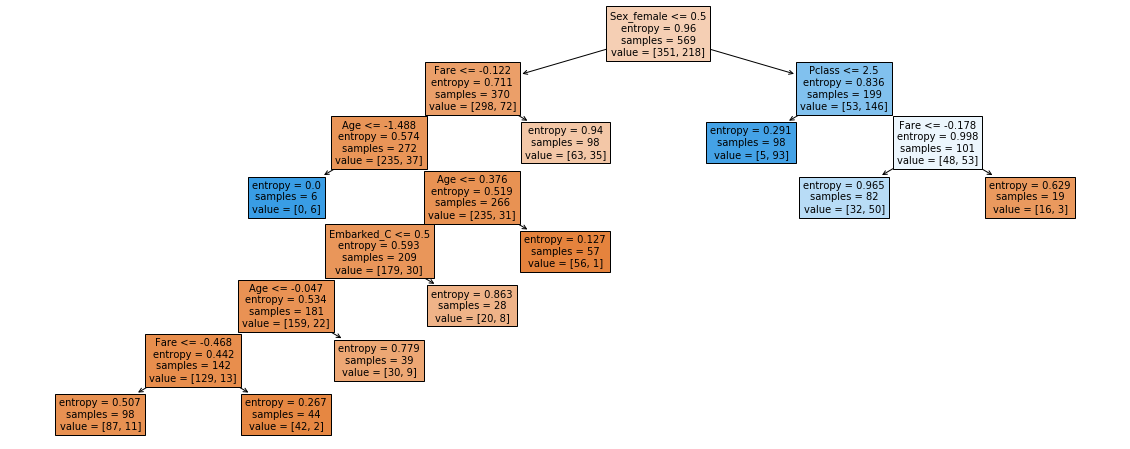

In [77]:
plt.figure(figsize=(20,8))
tree.plot_tree(df, feature_names = X_test.columns,filled=True)
plt.show()

### Step 3: Test your models

In [78]:
X_train = train.drop('Survived' , axis=1)
y_train = train['Survived']
X_test = test.drop('Survived', axis = 1)
y_test = test['Survived']
X_train[['Age' , 'Fare']] = scaler.fit_transform(X_train[['Age' , 'Fare']])
X_test[['Age' , 'Fare']] = scaler.fit_transform(X_test[['Age' , 'Fare']])

In [79]:
y_pred = df.predict(X_test)
test = pd.read_csv('holdout_test.csv')
test["Survived"] = y_pred
#Generate Result to CSV
test.to_csv('Titanic Results_Richard_Yang.csv', index=False)

### Step4

####  Models I used including: Logistic Regression, Decision Tree, SVM, ROC Curve and KNN

#### From the Above Results, we can see that the Decision Tree Model has the best performance with the highest accuracy score.T he Decision Tree is a good way to avoid potential missing values and it does not require Normalization or scaling of data, but it prones to overfitting.  Logistic Regression is easy to implement, but it requires no multicollinearity between independent variables which could exist in the model. In addition, it is tough to obtain complex relationships using logistic regression. The SVM is more accurate if the demension gets higher, and it is tough to deal with large amount of data.  The KNN is  Simple to understand and impelment, but it is slow for large datasets. The ROC curve can directly show the ranking instead of probability. However, the confidence scores used to build ROC curves may be difficult to assign. 